In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

plt.rcParams.update({'font.size': 14})

# Interpretarea coeficientilor regresiei

In [2]:
diamond = pd.read_csv('diamond.csv')
diamond.head()

,Unnamed: 0,carat,price
0,1,0.17,355
1,2,0.16,328
2,3,0.17,350
3,4,0.18,325
4,5,0.25,642


intercept: -259.62590719155486 coefficient: 3721.024851550472


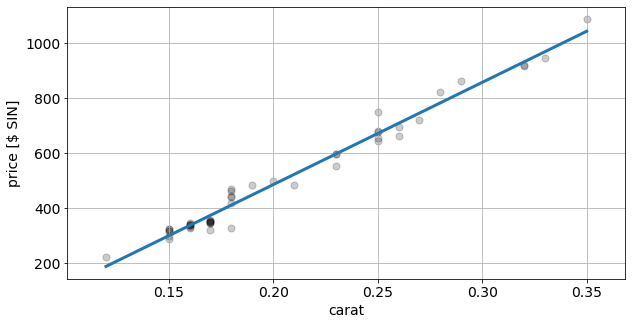

In [3]:
x, y = np.array(diamond['carat'].values), np.array(diamond['price'].values)

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('intercept:', beta0, 'coefficient:', beta1)

x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = beta0 + beta1 * x1

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .2, s=50)
ax.plot(x1, y1, lw=3)
ax.set(xlabel="carat", ylabel="price [$ SIN]")
ax.grid(True)
plt.show()

mean(X): 0.2041666666666667
intercept: 500.0833333333336 coefficient: 3721.024851550472


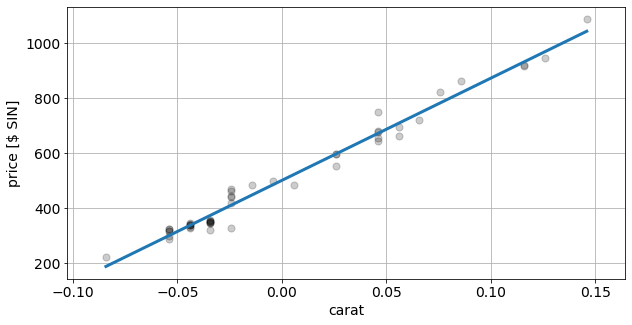

In [4]:
x, y = np.array(diamond['carat'].values), np.array(diamond['price'].values)

print('mean(X):', np.mean(x))
x -= np.mean(x)

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('intercept:', beta0, 'coefficient:', beta1)

x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = beta1 * x1 + beta0

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .2, s=50)
ax.plot(x1, y1, lw=3)
ax.set(xlabel="carat", ylabel="price [$ SIN]")
ax.grid(True)
plt.show()

# Residuals

intercept: -259.62590719155486 coefficient: 3721.024851550472


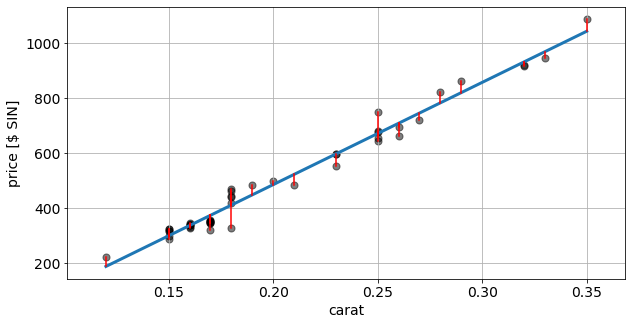

In [5]:
x, y = np.array(diamond['carat'].values), np.array(diamond['price'].values)

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('intercept:', beta0, 'coefficient:', beta1)

def f(x):
    return beta0 + beta1 * x

x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = f(x1)
yf = f(x)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .5, s=50)
ax.plot(x1, y1, lw=3)
[plt.plot([x[i], x[i]], [y[i], yf[i]], c='r') for i in range(len(x))]
ax.set(xlabel="carat", ylabel="price [$ SIN]")
ax.grid(True)
plt.show()

In [6]:
np.sum(y - yf)

1.0743406164692715e-11

In [7]:
# acestea sunt residuals, fie le luam din model, fie calculate
print(lm.resid), print(y - yf)

[-17.94831757  -7.73806906 -22.94831757 -85.15856609 -28.6303057
   6.26193094  23.47217946  37.6311854  -38.78931163  24.47217946
  51.84143391  40.73894876   0.26193094  13.42093688  -1.20980867
  40.52870024  36.10292501 -44.84055421  79.3696943  -25.05080273
  57.84143391   9.26193094 -20.94831757  -3.73806906 -19.94831757
  27.84143391 -54.94831757   8.84143391 -26.94831757  16.47217946
 -22.94831757 -13.1020453  -12.1020453   -0.52782054   3.26193094
   2.26193094  -1.20980867 -43.20980867 -27.94831757 -23.31229382
 -15.6303057   43.26720915  32.84143391   7.3696943    4.3696943
 -11.52782054 -14.84055421  17.47217946]
[-17.94831757  -7.73806906 -22.94831757 -85.15856609 -28.6303057
   6.26193094  23.47217946  37.6311854  -38.78931163  24.47217946
  51.84143391  40.73894876   0.26193094  13.42093688  -1.20980867
  40.52870024  36.10292501 -44.84055421  79.3696943  -25.05080273
  57.84143391   9.26193094 -20.94831757  -3.73806906 -19.94831757
  27.84143391 -54.94831757   8.8414339

(None, None)

In [8]:
# tehnic, suma reziduurilor este zero
np.sum(lm.resid), np.sum(lm.resid * x)

(1.0743406164692715e-11, 2.3447910280083306e-12)

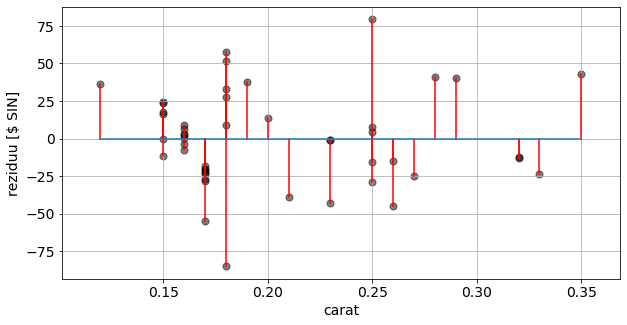

In [9]:
# scatter plot pentru residuals
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, lm.resid, c='k', alpha = .5, s=50)
[plt.plot([x[i], x[i]], [0, lm.resid[i]], c='r') for i in range(len(x))]
plt.plot([np.min(x), np.max(x)], [0, 0])
ax.set(xlabel="carat", ylabel="reziduu [$ SIN]")
ax.grid(True)
plt.show()

In [10]:
print(np.sqrt(np.sum(lm.resid**2)/(len(lm.resid) - 2)))

31.840522265031762


intercept: 0.9566646435001429 coefficient: 1.3740701249155776


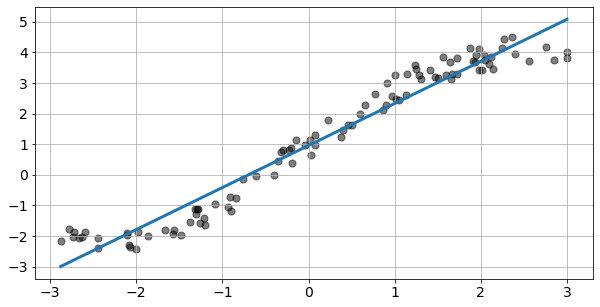

In [11]:
# model cu doua tipuri de variatii, liniara si non-liniara
x = np.random.rand(100) * 6 - 3
y = x + np.sin(x) + np.random.rand(100) + np.sqrt(0.2)

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('intercept:', beta0, 'coefficient:', beta1)

def f(x):
    return beta0 + beta1 * x

x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = f(x1)
yf = f(x)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .5, s=50)
ax.plot(x1, y1, lw=3)
ax.grid(True); plt.show()

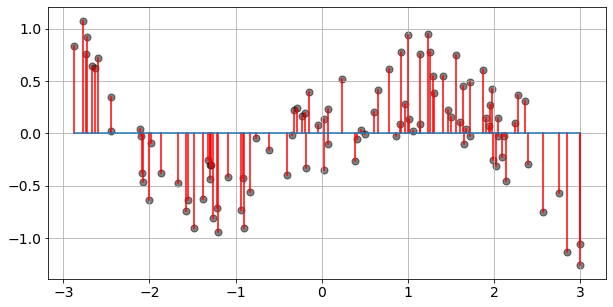

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, lm.resid, c='k', alpha = .5, s=50)
[plt.plot([x[i], x[i]], [0, lm.resid[i]], c='r') for i in range(len(x))]
plt.plot([np.min(x), np.max(x)], [0, 0])
ax.grid(True)
plt.show()

intercept: -4.965052828398431e-05 coefficient: 1.0000266285467057


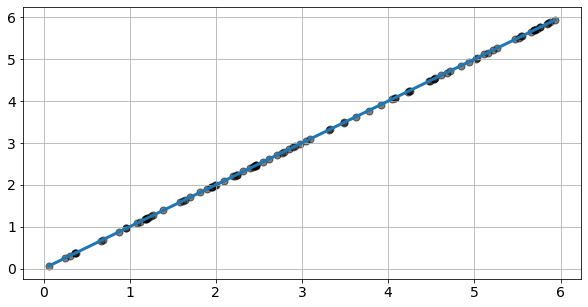

In [13]:
# model cu doua tipuri de variatii, liniara si non-liniara
x = np.random.rand(100) * 6
y = x + (np.random.rand(100) - 0.5) * .001 * x

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('intercept:', beta0, 'coefficient:', beta1)

def f(x):
    return beta0 + beta1 * x

x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = f(x1)
yf = f(x)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .5, s=50)
ax.plot(x1, y1, lw=3)
ax.grid(True); plt.show()

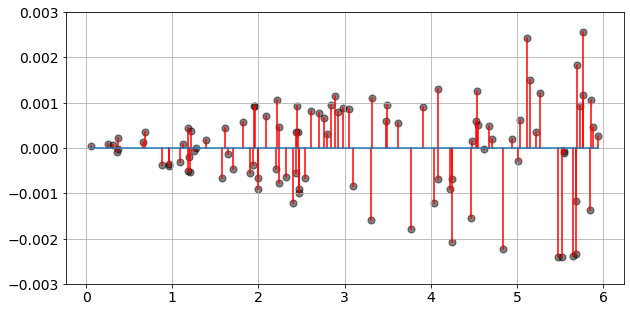

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, lm.resid, c='k', alpha = .5, s=50)
[plt.plot([x[i], x[i]], [0, lm.resid[i]], c='r') for i in range(len(x))]
plt.plot([np.min(x), np.max(x)], [0, 0])
ax.set_ylim(-0.003, 0.003)
ax.grid(True)
plt.show()

# Constructia statisticilor pentru coeficientii regresiei

In [15]:
# vezi documentatia, http://www.statsmodels.org/stable/examples/notebooks/generated/ols.html
x, y = np.array(diamond['carat'].values), np.array(diamond['price'].values)

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('intercept:', beta0, 'coefficient:', beta1)

n = len(lm.resid)
sigma = np.sqrt(np.sum(lm.resid**2)/(n - 2))
print('sigma:', sigma)

sx = np.sum((x - np.mean(x))**2)
se_beta0 = np.sqrt(1/n + np.mean(x)**2 / sx) * sigma
se_beta1 = sigma / np.sqrt(sx)

stat_beta0, stat_beta1 = beta0 / se_beta0, beta1 / se_beta1
p_beta0 = 2 * stats.t.sf(np.abs(stat_beta0), df=n-2)
p_beta1 = 2 * stats.t.sf(np.abs(stat_beta1), df=n-2)
i_beta0 = beta0 + np.array([-1, 1]) * stats.t.ppf(0.975, df=n-2) * se_beta0
i_beta1 = beta1 + np.array([-1, 1]) * stats.t.ppf(0.975, df=n-2) * se_beta1

intercept: -259.62590719155486 coefficient: 3721.024851550472
sigma: 31.840522265031762


In [16]:
df1 = pd.DataFrame([['beta0', beta0, se_beta0, stat_beta0, p_beta0, i_beta0[0], i_beta0[1]],
                   ['beta1', beta1, se_beta1, stat_beta1, p_beta1, i_beta1[0], i_beta1[1]]],
                columns=['Parameter', 'Estimate', 'Std. Error', 't Value', 'P(>|t|)', '[0.025', '0.975]'])
df2 = pd.DataFrame([['beta0', lm.params[0], lm.bse[0], lm.tvalues[0], lm.pvalues[0], lm.conf_int()[0][0], 
                     lm.conf_int()[0][1]],
                    ['beta1', lm.params[1], lm.bse[1], lm.tvalues[1], lm.pvalues[1], lm.conf_int()[1][0], 
                     lm.conf_int()[1][1]]],                  
                columns=['Parameter', 'Estimate', 'Std. Error', 't Value', 'P(>|t|)', '[0.025', '0.975]'])
print(df1)
print(df2)

  Parameter     Estimate  Std. Error    t Value       P(>|t|)       [0.025  \
0     beta0  -259.625907   17.318856 -14.990938  2.523271e-19  -294.486957   
1     beta1  3721.024852   81.785880  45.497155  6.751260e-40  3556.398413   

        0.975]  
0  -224.764858  
1  3885.651290  
  Parameter     Estimate  Std. Error    t Value       P(>|t|)       [0.025  \
0     beta0  -259.625907   17.318856 -14.990938  2.523271e-19  -294.486957   
1     beta1  3721.024852   81.785880  45.497155  6.751260e-40  3556.398413   

        0.975]  
0  -224.764858  
1  3885.651290  


In [17]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2070.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           6.75e-40
Time:                        09:04:40   Log-Likelihood:                -233.20
No. Observations:                  48   AIC:                             470.4
Df Residuals:                      46   BIC:                             474.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -259.6259     17.319    -14.991      0.0

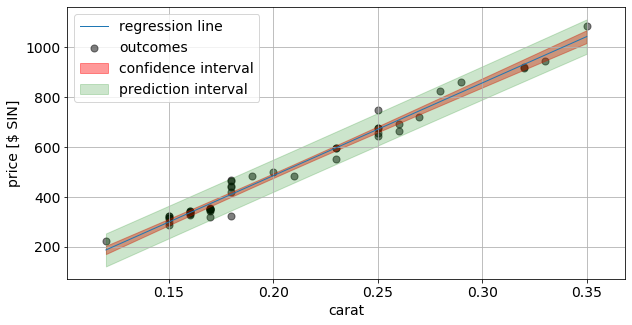

In [18]:
def f(x):
    return beta0 + beta1 * x

x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = f(x1)

# t quantile
t = stats.t.ppf(0.975, df=n-2)

# dispersia reziduurilor
sigma = np.sqrt(np.sum(lm.resid**2)/(n-2))

# confidence interval pentru dreapta
ci = t * sigma * np.sqrt(1/n + (x1-np.mean(x))**2 / np.sum((x-np.mean(x))**2))

# confidence interval pentru predictie (prediction interval)
pi = t * sigma * np.sqrt(1 + 1/n + (x1-np.mean(x))**2 / np.sum((x-np.mean(x))**2))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .5, s=50)
ax.plot(x1, y1, lw=1)
ax.fill_between(x1, y1-ci, y1+ci, color='red', alpha=0.4)
ax.fill_between(x1, y1-pi, y1+pi, color='green', alpha=0.2)
ax.set(xlabel="carat", ylabel="price [$ SIN]")
ax.grid(True)
ax.legend(['regression line', 'outcomes', 'confidence interval', 'prediction interval'])
plt.show()

# Laborator

__Q1__. Potriviți o regresie liniară pentru setul father.son cu father.height ca și predictor pentru son.height. 

a) Dați p-value pentru panta regresiei și formulați cele două ipoteze și interpretați rezultatul testului.

b) Interpretați de asemenea și intercept-ul. Centrați x în zero, re-aplicați regresia și interpretați intercept-ul.

In [19]:
father_son = pd.read_csv('father_son.csv')
father_son.head()

,Unnamed: 0,fheight,sheight
0,1,65.04851,59.77827
1,2,63.25094,63.21404
2,3,64.95532,63.34242
3,4,65.75250,62.79238
4,5,61.13723,64.28113


In [20]:
x = father_son.fheight
y = father_son.sheight

In [21]:
xext = sm.add_constant(x)
lm = sm.OLS(y,xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('interceptul: ', beta0, 'panta: ', beta1)

interceptul:  33.88660435407803 panta:  0.5140930386233061


In [22]:
print('PUNCTUL A:')
print('PValue pentru panta: ', lm.pvalues[1])
print('Ipoteza nula: nu exista corelatie(panta = 0)')
print('Ipoteza alternativa: exista corelatie(panta != 0)')
print('PValue este foarte mic => rejectam ipoteza nula => exista corelatie')

PUNCTUL A:
PValue pentru panta:  1.121267549633174e-69
Ipoteza nula: nu exista corelatie(panta = 0)
Ipoteza alternativa: exista corelatie(panta != 0)
PValue este foarte mic => rejectam ipoteza nula => exista corelatie


In [23]:
print('PUNCTUL B:')
print('interceptul: ', beta0)
xcentered = x - np.mean(x)
xcenteredext = sm.add_constant(xcentered)
lmcentered = sm.OLS(y,xcenteredext).fit()
beta0centered = lmcentered.params[0]
print('interceptul: ', beta0centered)
#intercept = valoarea lui y daca x = 0

PUNCTUL B:
interceptul:  33.88660435407803
interceptul:  68.68406965677181


__Q2__. Pentru același set father.son, preziceți înălțimea fiului dacă tatăl are înălțimea 80. Ați recomanda această predicție? Care este intervalul de confidență asociat predicției (care este intevalul de valori 95%)?

In [24]:
x = father_son.fheight
y = father_son.sheight
xext = sm.add_constant(x)
lm = sm.OLS(y,xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
x_hf = 80
y_hs = beta0 + beta1 * x_hf
n = len(x)
sigma = np.sqrt(np.sum(lm.resid**2)/(n-2))
print(y_hs)
t = stats.t.ppf(0.975, df = n - 2)
pi = t * sigma * np.sqrt(1 +1/n + (x_hf-np.mean(x))**2 / np.sum((x-np.mean(x))**2))
y_hs-pi,y_hs+pi

75.01404744394253


(70.18645536465674, 79.84163952322832)

__Q3__. Pentru setul mtcars:

a) Realizați regresia liniară pentru mpg ca și răspuns (outcome) respectiv horsepower ca și predictor. Dați interpretarea coeficienților, recentrînd x dacă e necesar. 

b) Puneți dreapta de regresie pe un scatterplot.

c) Testați ipoteza că nu există nici o corelație liniară între horsepower și mpg.

d) Ridicați un plot al reziduurilor vs. horsepower. Estimați dispersia reziduurilor direct, respectiv folosind modelul calculat.

e) Care este R-squared și ce exprimă el pentru acest caz?

In [25]:
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [26]:
y = mtcars.mpg
x = mtcars.hp

In [27]:
print('PUNCTUL A:')
xext = sm.add_constant(x)
lm = sm.OLS(y,xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('interceptul: ', beta0, 'panta: ', beta1)

xcentered = x - np.mean(x)
xcenteredext = sm.add_constant(xcentered)
lmcentered = sm.OLS(y,xcenteredext).fit()
beta0centered, beta1centered = lmcentered.params[0], lmcentered.params[1]
print('interceptul: ', beta0centered, 'panta: ', beta1centered)

PUNCTUL A:
interceptul:  30.098860539622514 panta:  -0.06822827807156367
interceptul:  20.090625000000006 panta:  -0.06822827807156362


PUNCTUL B:


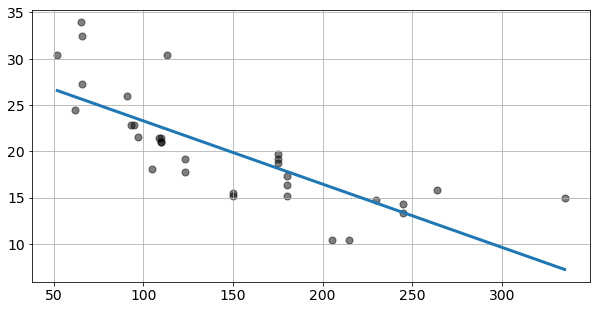

In [28]:
print('PUNCTUL B:')
def f(x):
    return beta0 + beta1 * x

x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = f(x1)
yf = f(x)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .5, s=50)
ax.plot(x1, y1, lw=3)
ax.grid(True); plt.show()

In [29]:
print('PUNCTUL C:')
print('PValue pentru intercept: ', lm.pvalues[0])
print('PValue pentru panta: ', lm.pvalues[1])
print('Ipoteza nula: nu exista corelatie(panta = 0)')
print('Ipoteza alternativa: exista corelatie(panta != 0)')
print('PValue este foarte mic => rejectam ipoteza nula => exista corelatie')

PUNCTUL C:
PValue pentru intercept:  6.64273603046494e-18
PValue pentru panta:  1.7878352541210553e-07
Ipoteza nula: nu exista corelatie(panta = 0)
Ipoteza alternativa: exista corelatie(panta != 0)
PValue este foarte mic => rejectam ipoteza nula => exista corelatie


PUNCTUL D:


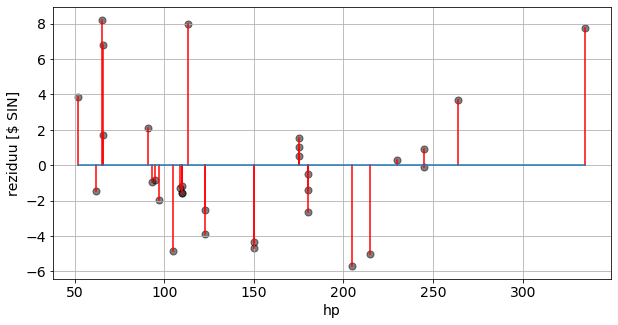

Dispersia rezidurilor:  14.922477118153394
Dispersia rezidurilor:  14.922477118153397


In [30]:
print('PUNCTUL D:')
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, lm.resid, c='k', alpha = .5, s=50)
[plt.plot([x[i], x[i]], [0, lm.resid[i]], c='r') for i in range(len(x))]
plt.plot([np.min(x), np.max(x)], [0, 0])
ax.set(xlabel="hp", ylabel="reziduu [$ SIN]")
ax.grid(True)
plt.show()

n = len(lm.resid)
sigma = np.sqrt(np.sum(lm.resid**2)/(n-2))
sx = np.sum((x-np.mean(x))**2)

print('Dispersia rezidurilor: ', lm.scale)
print('Dispersia rezidurilor: ', np.sum(lm.resid**2)/(n-2))

In [31]:
print('PUNCTUL E:')
print('R squared: ',lm.rsquared)
#Cu cât R squared e mai mare, cu atât modelul de regresie se potriveste prezicerii

PUNCTUL E:
R squared:  0.6024373414239339


__Q4__. Pentru setul father.son:

a) Calculați intervalul de confidență pentru intercept și pentru slope.

b) Calculați intervalul de confidență pentru valoarea așteptată a înălțimii fiului pentru valoarea medie a înălțimii taților (confidence interval pentru linia de regresie, într-un punct dat).

c) Calculați prediction interval pentru înălțimea fiului pentru valoarea medie a înălțimii taților (confidence interval pentru predicție, într-un punct dat).

d) Puneți pe un scatter plot punctele, dreapta de regresie și intervalele de confidență pentru valoarea așteptată respectiv predicție.

In [32]:
x = father_son.fheight
y = father_son.sheight
xext = sm.add_constant(x)
lm = sm.OLS(y,xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('interceptul: ', beta0, 'panta: ', beta1)

interceptul:  33.88660435407803 panta:  0.5140930386233061


In [33]:
print('PUNCTUL A:')
n = len(lm.resid)
sigma = np.sqrt(np.sum(lm.resid**2)/(n-2))
sx = np.sum((x - np.mean(x))**2)
se_beta0 = np.sqrt(1/n + np.mean(x)**2 / sx) * sigma
se_beta1 = sigma / np.sqrt(sx)
i_beta0 = beta0 + np.array([-1,1]) * stats.t.ppf(0.975, df = n-2) * se_beta0
i_beta1 = beta1 + np.array([-1,1]) * stats.t.ppf(0.975, df = n-2) * se_beta1
print('Interval de confidență intercept: ', i_beta0)
print('Interval de confidență panta: ', i_beta1)

PUNCTUL A:
Interval de confidență intercept:  [30.29121257 37.48199614]
Interval de confidență panta:  [0.46101879 0.56716729]


In [34]:
print('PUNCTUL B:')
xpct = np.mean(x)
ypct = f(xpct)
x1 = np.linspace(np.min(x),np.max(x),100)
y1 = f(x1)
t = stats.t.ppf(0.975, df = n - 2)
ci = t * sigma * np.sqrt(1/n + (xpct-np.mean(x))**2 / np.sum((x-np.mean(x))**2))
ypct-ci,ypct+ci

PUNCTUL B:


(68.53845541171117, 68.8296839018324)

In [35]:
print('PUNCTUL C:')
pi = t * sigma * np.sqrt(1 + 1/n + (xpct-np.mean(x))**2 / np.sum((x-np.mean(x))**2))
ypct-pi,ypct+pi

PUNCTUL C:


(63.90091321720463, 73.46722609633893)

PUNCTUL D:


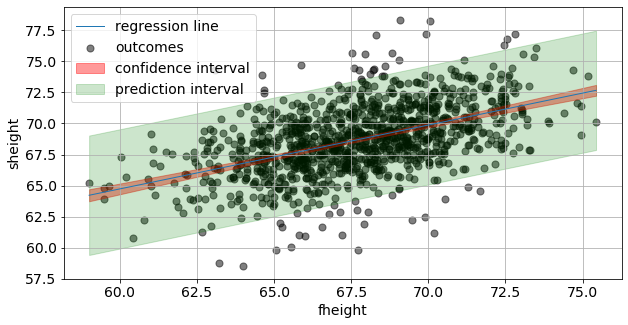

In [36]:
print('PUNCTUL D:')
x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = f(x1)

# t quantile
t = stats.t.ppf(0.975, df=n-2)

# dispersia reziduurilor
sigma = np.sqrt(np.sum(lm.resid**2)/(n-2))

# confidence interval pentru dreapta
ci = t * sigma * np.sqrt(1/n + (x1-np.mean(x))**2 / np.sum((x-np.mean(x))**2))

# confidence interval pentru predictie (prediction interval)
pi = t * sigma * np.sqrt(1 + 1/n + (x1-np.mean(x))**2 / np.sum((x-np.mean(x))**2))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .5, s=50)
ax.plot(x1, y1, lw=1)
ax.fill_between(x1, y1-ci, y1+ci, color='red', alpha=0.4)
ax.fill_between(x1, y1-pi, y1+pi, color='green', alpha=0.2)
ax.set(xlabel="fheight", ylabel="sheight")
ax.grid(True)
ax.legend(['regression line', 'outcomes', 'confidence interval', 'prediction interval'])
plt.show()

__Q5__. Pentru setul mtcars, realizați același lucruri ca la întrebarea anterioară.

In [37]:
y = mtcars.mpg
x = mtcars.hp
xext = sm.add_constant(x)
lm = sm.OLS(y,xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('interceptul: ', beta0, 'panta: ', beta1)

interceptul:  30.098860539622514 panta:  -0.06822827807156367


In [38]:
print('PUNCTUL A:')
n = len(lm.resid)
sigma = np.sqrt(np.sum(lm.resid**2)/(n-2))
sx = np.sum((x - np.mean(x))**2)
se_beta0 = np.sqrt(1/n + np.mean(x)**2 / sx) * sigma
se_beta1 = sigma / np.sqrt(sx)
i_beta0 = beta0 + np.array([-1,1]) * stats.t.ppf(0.975, df = n-2) * se_beta0
i_beta1 = beta1 + np.array([-1,1]) * stats.t.ppf(0.975, df = n-2) * se_beta1
print('Interval de confidență intercept: ', i_beta0)
print('Interval de confidență panta: ', i_beta1)

PUNCTUL A:
Interval de confidență intercept:  [26.76194879 33.43577229]
Interval de confidență panta:  [-0.08889465 -0.0475619 ]


In [39]:
print('PUNCTUL B:')
xpct = np.mean(x)
ypct = f(xpct)
x1 = np.linspace(np.min(x),np.max(x),100)
y1 = f(x1)
t = stats.t.ppf(0.975, df = n - 2)
ci = t * sigma * np.sqrt(1/n + (xpct-np.mean(x))**2 / np.sum((x-np.mean(x))**2))
ypct-ci,ypct+ci

PUNCTUL B:


(18.69599452252757, 21.485255477472464)

In [40]:
print('PUNCTUL C:')
pi = t * sigma * np.sqrt(1 + 1/n + (xpct-np.mean(x))**2 / np.sum((x-np.mean(x))**2))
ypct-pi,ypct+pi

PUNCTUL C:


(12.079082853388314, 28.10216714661172)

PUNCTUL D:


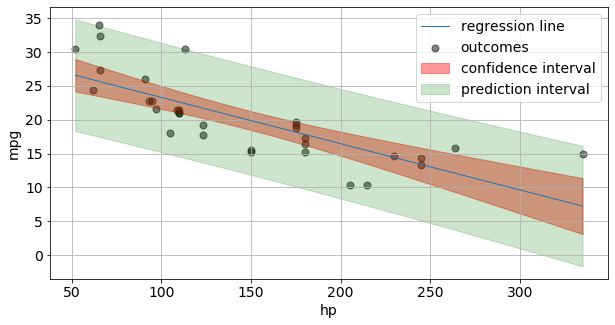

In [41]:
print('PUNCTUL D:')
x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = f(x1)

# t quantile
t = stats.t.ppf(0.975, df=n-2)

# dispersia reziduurilor
sigma = np.sqrt(np.sum(lm.resid**2)/(n-2))

# confidence interval pentru dreapta
ci = t * sigma * np.sqrt(1/n + (x1-np.mean(x))**2 / np.sum((x-np.mean(x))**2))

# confidence interval pentru predictie (prediction interval)
pi = t * sigma * np.sqrt(1 + 1/n + (x1-np.mean(x))**2 / np.sum((x-np.mean(x))**2))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .5, s=50)
ax.plot(x1, y1, lw=1)
ax.fill_between(x1, y1-ci, y1+ci, color='red', alpha=0.4)
ax.fill_between(x1, y1-pi, y1+pi, color='green', alpha=0.2)
ax.set(xlabel="hp", ylabel="mpg")
ax.grid(True)
ax.legend(['regression line', 'outcomes', 'confidence interval', 'prediction interval'])
plt.show()

__Q6__. Construiți două dataset-uri, y funcție de x, unul fără și altul cu variație reziduală (heteroscedasticity). x-urile vor fi comune (de exemplu, x = 1 .. 10). Mediile și dispersiile lor trebuie să fie egale. 

a) Determinați dreptele de regresie.

b) Ridicați diagrama reziduurilor.

c) Determinați R-squared.

d) Afișați intevalele de confidență pentru răspunsul așteptat (dreapta de regresie) respectiv pentru predicție.

Ce concluzii trageți?

In [42]:
print('PUNCTUL A:')
x = np.random.uniform(0,10,100)
y1 = x + np.random.rand(100) - 0.5
y2 = x + (np.random.rand(100) - 0.5) * .001 * x

xext = sm.add_constant(x)

lm1 = sm.OLS(y1, xext).fit()
beta01, beta11 = lm1.params[0], lm1.params[1]
print('intercept:', beta01, 'coefficient:', beta11)

lm2 = sm.OLS(y2, xext).fit()
beta02, beta12 = lm2.params[0], lm2.params[1]
print('intercept:', beta02, 'coefficient:', beta12)

PUNCTUL A:
intercept: 0.04008650658284396 coefficient: 0.9876955104662767
intercept: -0.00014735358469492033 coefficient: 1.0000749415701795


In [43]:
np.mean(y1), np.mean(y2)

(5.01989613915641, 5.042077476389022)

In [44]:
np.std(y1), np.std(y2)

(2.7391527733965733, 2.760042252285438)

PUNCTUL B:


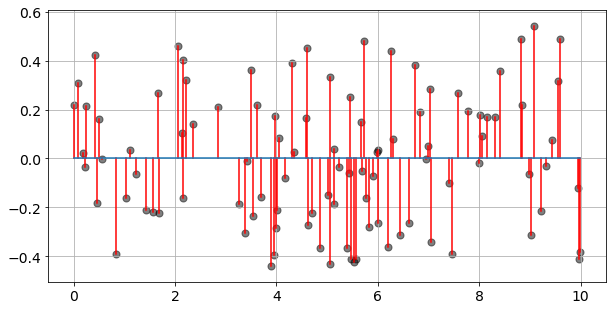

In [45]:
print('PUNCTUL B:')
def f1(x):
    return beta01 + beta11 * x
def f2(x):
    return beta02 + beta12 * x

x1 = np.linspace(np.min(x), np.max(x), 100)
y = f1(x1)
yf = f1(x)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, lm1.resid, c='k', alpha = .5, s=50)
[plt.plot([x[i], x[i]], [0, lm1.resid[i]], c='r') for i in range(len(x))]
plt.plot([np.min(x), np.max(x)], [0, 0])

ax.grid(True)
plt.show()

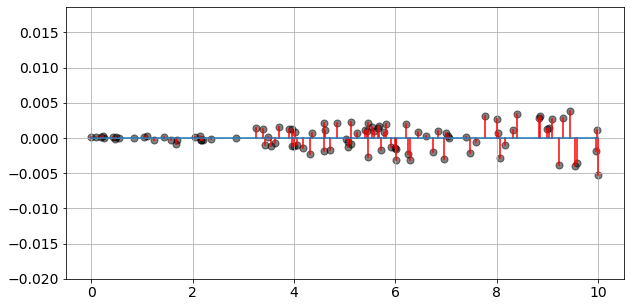

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, lm2.resid, c='k', alpha = .5, s=50)
[plt.plot([x[i], x[i]], [0, lm2.resid[i]], c='r') for i in range(len(x))]
plt.plot([np.min(x), np.max(x)], [0, 0])
ax.grid(True)
plt.show()

In [47]:
print('PUNCTUL C:')
lm1.rsquared, lm2.rsquared

PUNCTUL C:


(0.9903298001999534, 0.9999996055225647)

PUNCTUL D:


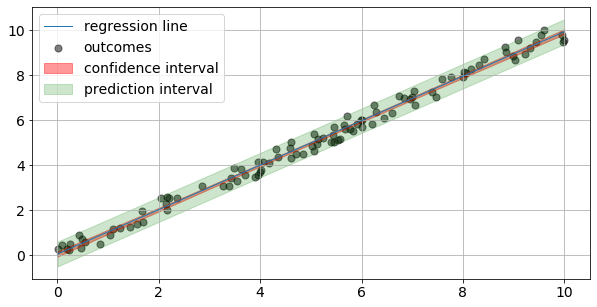

In [48]:
print('PUNCTUL D:')
x1 = np.linspace(np.min(x), np.max(x), 10)
y_ = f1(x1)
n= len(lm1.resid)
# t quantile
t = stats.t.ppf(0.975, df=n-2)

# dispersia reziduurilor
sigma = np.sqrt(np.sum(lm1.resid**2)/(n-2))

# confidence interval pentru dreapta
ci = t * sigma * np.sqrt(1/n + (x1-np.mean(x))**2 / np.sum((x-np.mean(x))**2))

# confidence interval pentru predictie (prediction interval)
pi = t * sigma * np.sqrt(1 + 1/n + (x1-np.mean(x))**2 / np.sum((x-np.mean(x))**2))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y1, c='k', alpha = .5, s=50)
ax.plot(x1, y_, lw=1)
ax.fill_between(x1, y_-ci, y_+ci, color='red', alpha=0.4)
ax.fill_between(x1, y_-pi, y_+pi, color='green', alpha=0.2)
ax.grid(True)
ax.legend(['regression line', 'outcomes', 'confidence interval', 'prediction interval'])
plt.show()

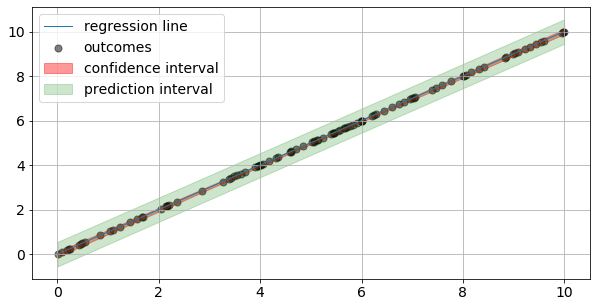

In [49]:
x1 = np.linspace(np.min(x), np.max(x), 10)
y_ = f2(x1)
n= len(lm1.resid)
# t quantile
t = stats.t.ppf(0.975, df=n-2)

# dispersia reziduurilor
sigma = np.sqrt(np.sum(lm1.resid**2)/(n-2))

# confidence interval pentru dreapta
ci = t * sigma * np.sqrt(1/n + (x1-np.mean(x))**2 / np.sum((x-np.mean(x))**2))

# confidence interval pentru predictie (prediction interval)
pi = t * sigma * np.sqrt(1 + 1/n + (x1-np.mean(x))**2 / np.sum((x-np.mean(x))**2))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y2, c='k', alpha = .5, s=50)
ax.plot(x1, y_, lw=1)
ax.fill_between(x1, y_-ci, y_+ci, color='red', alpha=0.4)
ax.fill_between(x1, y_-pi, y_+pi, color='green', alpha=0.2)
ax.grid(True)
ax.legend(['regression line', 'outcomes', 'confidence interval', 'prediction interval'])
plt.show()